# GSE100426 - Mann
## Xiaonan Wang
## 24May2023

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns
import smqpp

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
print(smqpp.__version__)

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.1 statsmodels==0.13.1 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.5
0.1.2


# Read in and tidyup

In [2]:
GSE100426 = sc.read("./Data/GSE100426_cnt.txt").T

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [3]:
meta = pd.read_csv("./Data/GSE100426_meta.txt", sep='\t')
print(meta.shape)

(1445, 17)


In [4]:
GSE100426.obs = meta

In [5]:
GSE100426 = GSE100426[GSE100426.obs['con'] == 'nostim',:].copy()

In [29]:
GSE100426.obs.head()

,Accession,Title,Sample.Type,Taxonomy,Channels,Platform,Series,Supplementary.Types,Supplementary.Links,SRA.Accession,...,Release.Date,ct,age,batch,con,ID,Condition,n_genes,n_counts,p53S
LT_old_mouse2_plate1_nostim_sc_A1_S193,GSM2680760,LT_old_mouse2_plate1_nostim_sc_A1_S193,SRA,Mus musculus,1,GPL19057,GSE100426;GSE100428,SRA Run Selector,https://www.ncbi.nlm.nih.gov/Traces/study/?acc...,SRX2951004,...,"Jul 19, 2017",LT,old,b1,nostim,LT_old_mouse2_plate1_nostim_sc_A1_S193,LT_old,3727,253386.0,-0.117444
LT_old_mouse2_plate1_nostim_sc_A2_S194,GSM2680761,LT_old_mouse2_plate1_nostim_sc_A2_S194,SRA,Mus musculus,1,GPL19057,GSE100426;GSE100428,SRA Run Selector,https://www.ncbi.nlm.nih.gov/Traces/study/?acc...,SRX2951005,...,"Jul 19, 2017",LT,old,b1,nostim,LT_old_mouse2_plate1_nostim_sc_A2_S194,LT_old,3644,196654.0,-0.154416
LT_old_mouse2_plate1_nostim_sc_A3_S195,GSM2680762,LT_old_mouse2_plate1_nostim_sc_A3_S195,SRA,Mus musculus,1,GPL19057,GSE100426;GSE100428,SRA Run Selector,https://www.ncbi.nlm.nih.gov/Traces/study/?acc...,SRX2951006,...,"Jul 19, 2017",LT,old,b1,nostim,LT_old_mouse2_plate1_nostim_sc_A3_S195,LT_old,3253,274131.0,0.228863
LT_old_mouse2_plate1_nostim_sc_A4_S196,GSM2680763,LT_old_mouse2_plate1_nostim_sc_A4_S196,SRA,Mus musculus,1,GPL19057,GSE100426;GSE100428,SRA Run Selector,https://www.ncbi.nlm.nih.gov/Traces/study/?acc...,SRX2951007,...,"Jul 19, 2017",LT,old,b1,nostim,LT_old_mouse2_plate1_nostim_sc_A4_S196,LT_old,3300,219081.0,-0.028496
LT_old_mouse2_plate1_nostim_sc_B1_S205,GSM2680764,LT_old_mouse2_plate1_nostim_sc_B1_S205,SRA,Mus musculus,1,GPL19057,GSE100426;GSE100428,SRA Run Selector,https://www.ncbi.nlm.nih.gov/Traces/study/?acc...,SRX2951008,...,"Jul 19, 2017",LT,old,b1,nostim,LT_old_mouse2_plate1_nostim_sc_B1_S205,LT_old,3567,206210.0,-0.458752


In [6]:
GSE100426.obs['Condition'] = GSE100426.obs['ct'].astype(str)+'_'+GSE100426.obs['age'].astype(str)

In [30]:
GSE100426.obs['Condition'].value_counts()

MPP_old      140
ST_old       138
LT_old       114
MPP_young     97
ST_young      93
LT_young      89
Name: Condition, dtype: int64

# QC and normalisation

In [7]:
sc.pp.filter_cells(GSE100426, min_genes=500)
sc.pp.filter_genes(GSE100426, min_cells=1)

filtered out 4065 genes that are detected in less than 1 cells


In [10]:
GSE100426.write('./write/raw_GSE100426.h5ad')

In [11]:
sc.pp.normalize_per_cell(GSE100426, counts_per_cell_after=1e4)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [12]:
sc.pp.log1p(GSE100426)

In [13]:
GSE100426.raw = GSE100426

In [14]:
GSE100426.write('./write/norm_GSE100426.h5ad')

# p53 Score Calculation

In [15]:
GSE100426 = sc.read('./write/norm_GSE100426.h5ad')

In [16]:
GSE100426_norm = anndata.AnnData(X=GSE100426.raw.X, obs=GSE100426.obs, var=GSE100426.raw.var)

In [17]:
sc.pp.scale(GSE100426_norm)

In [19]:
p53GL = np.genfromtxt('/home/xw251/rds/rds-bg200-hphi-gottgens/users/xw251/Lab_Members/Niki/Patel_SMQ2/Analysis_17Feb2021/p53GL.txt', dtype='str')

In [20]:
print(p53GL)

['Aen' 'Bax' 'Bbc3' 'Casp1' 'Ccng1' 'Cdkn1a' 'Ctsd' 'Eda2r' 'Ier5' 'Perp'
 'Phlda3' 'Pml' 'Pvt1' 'Sulf2' 'Tnfrsf10b' 'Zmat3']


In [21]:
sc.tl.score_genes(GSE100426_norm,np.array(p53GL), score_name = 'p53S', use_raw=False)

computing score 'p53S'
    finished: added
    'p53S', score of gene set (adata.obs).
    499 total control genes are used. (0:00:00)


In [22]:
GSE100426.obs['p53S'] = GSE100426_norm.obs['p53S']

In [39]:
GSE100426.obs['age'] = GSE100426.obs['age'].astype('category')

In [26]:
GSE100426.obs['age'].cat.categories

Index(['old', 'young'], dtype='object')

In [40]:
GSE100426.obs['age'] = GSE100426.obs['age'].cat.reorder_categories(['young', 'old'])

In [41]:
GSE100426.write('./write/processed_GSE100426.h5ad')

In [43]:
GSE100426 = sc.read('./write/processed_GSE100426.h5ad')

In [44]:
# Extract HSCs only
GSE100426 = GSE100426[GSE100426.obs['ct'] != 'MPP'].copy()

young v.s. old: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.081e-04 U_stat=1.861e+04


(<AxesSubplot:title={'center':'HSC'}, ylabel='p53S'>,
 [<statannot.StatResult.StatResult at 0x2b47cefaa520>])

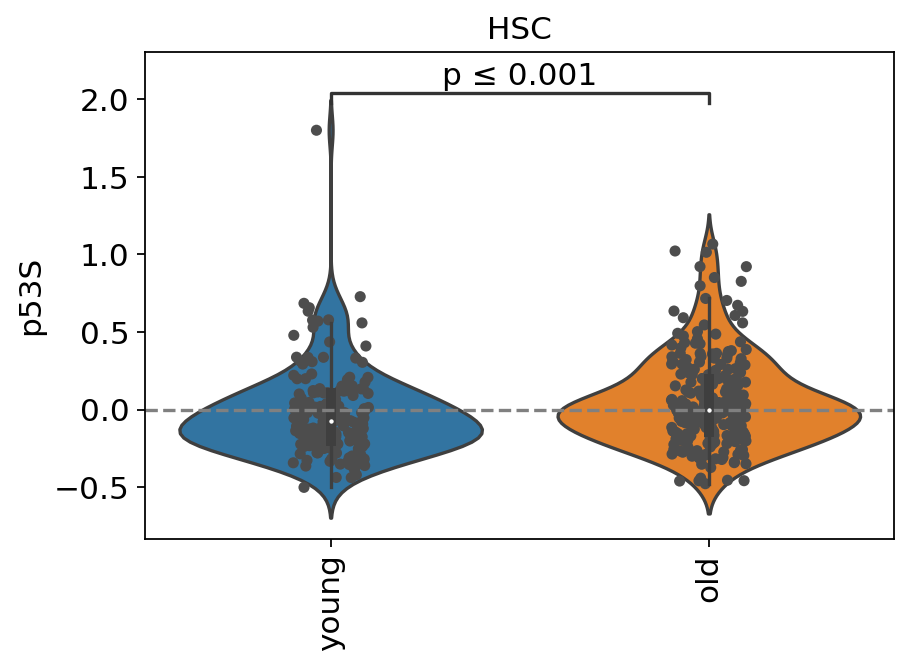

In [46]:
# Figure6C
from statannot import add_stat_annotation
fig, ax = plt.subplots(figsize=(6,4))
sns.violinplot(x='age', y='p53S', scale='width', data=GSE100426.obs, ax=ax)
sns.stripplot(x="age", y="p53S", data=GSE100426.obs, jitter=True, zorder=1, color=".3")
ax.set_xticklabels(labels=GSE100426.obs['age'].cat.categories,rotation=90)
ax.grid(False)
ax.set_xlabel('')
ax.set_title('HSC')
ax.axhline(y=0, linestyle="--", c='grey')
add_stat_annotation(ax, data=GSE100426.obs, x='age', y='p53S',
                        box_pairs=[('old', 'young')],
                        test='Mann-Whitney', text_format='simple', loc='inside', verbose=2)